In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 1. 读取图片
image_ori = cv2.imread(r'C:\Users\rainbow_yu\Desktop\test.png', cv2.IMREAD_COLOR)
image = cv2.cvtColor(image_ori, cv2.COLOR_BGR2RGB)

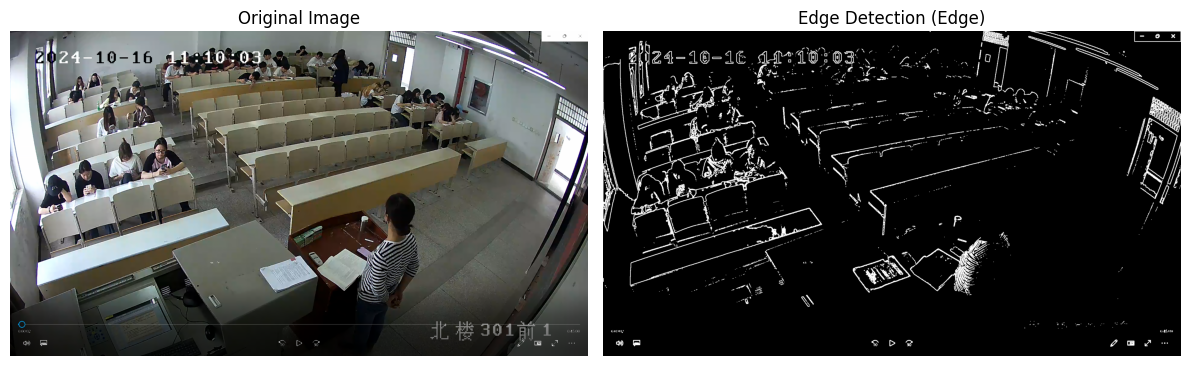

In [4]:
image_gray = cv2.cvtColor(image_ori, cv2.COLOR_BGR2GRAY)
# 2. 获取图像的高度和宽度
height, width = image_gray.shape

# 采用二值化方式处理图像。
ret, thresh=cv2.threshold(image_gray, 200, 255, 0)
_,white_img =cv2.threshold(image, 0, 0, 0)

#使用简易方式英取全部轮廓
contours, hierarchy= cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img_count = cv2.drawContours(white_img, contours, -1, (255,255,255), 2)

# 4. 显示原图和边缘检测结果
plt.figure(figsize=(12, 6))

# 显示原图
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')  # 关闭坐标轴

# 显示边缘检测结果
plt.subplot(1, 2, 2)
plt.title("Edge Detection (Edge)")
plt.imshow(img_count)
plt.axis('off')  # 关闭坐标轴

# 显示图像
plt.tight_layout()
plt.show()


In [64]:
def get_least_white_lines(image, m,n):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    row_id , col_id = image.shape
    # 统计每行和每列的白点数量
    row_white_counts = np.sum(image == 255, axis=1)  # 统计每行白点数量
    col_white_counts = np.sum(image == 255, axis=0)  # 统计每列白点数量
    
    # 获取白点最少的n行
    row_indices = np.argsort(row_white_counts)
    col_indices = np.argsort(col_white_counts)

    # 确保行号或列号之间的间隔大于x，选择符合条件的行或列
    selected_rows = []
    selected_cols = []

    # 选择行，保证间隔大于x
    for row in row_indices:
        if not selected_rows or abs(row - selected_rows[-1]) > row_id / (m + n):
            selected_rows.append(row)
        if len(selected_rows) >= m:
            break

    # 选择列，保证间隔大于x
    for col in col_indices:
        if not selected_cols or abs(col - selected_cols[-1]) > col_id / (m + n):
            selected_cols.append(col)
        if len(selected_cols) >= n:
            break
    print(row_indices)
    return selected_rows, selected_cols
    

# 设置间隔x和需要选择的行列数n
row = 2  # 需要选择的行列数
col = 2

selected_rows, selected_cols = get_least_white_lines(img_count, row, col)

print(f"Selected rows: {selected_rows}")
print(f"Selected cols: {selected_cols}")

[1437 1343 1344 ...  143    0    1]
Selected rows: [1437, 765]
Selected cols: [94, 2238]


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


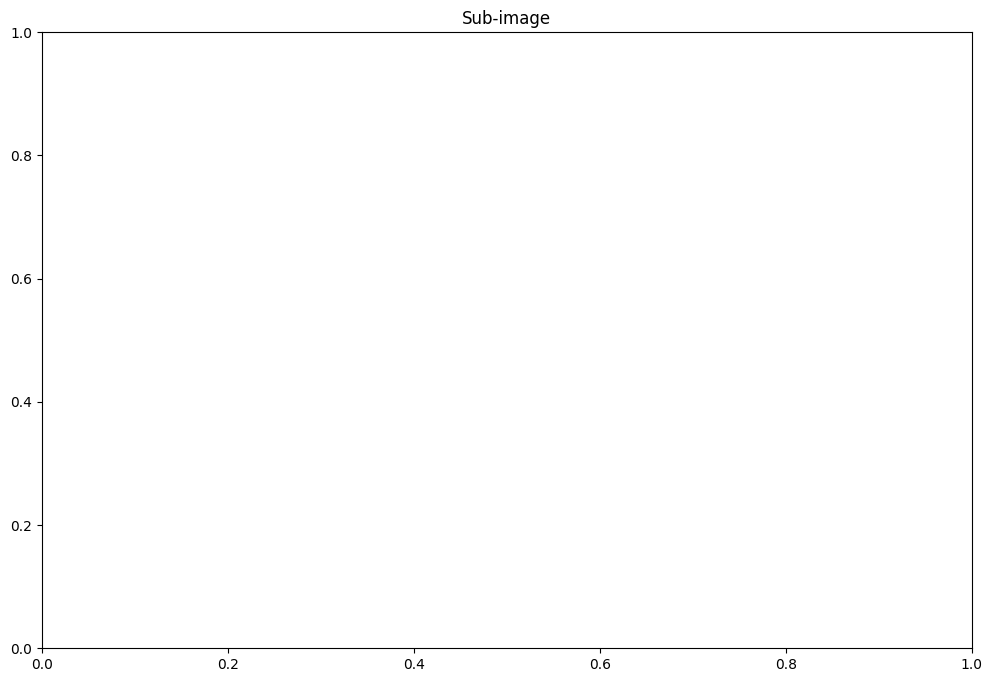

In [69]:
def split_image(image, selected_rows, selected_cols):
    """
    根据选定的行和列来分割图像
    """
    sub_images = []
    height, width ,_= image.shape
    
    # 计算每个子图的高度和宽度
    sub_height = height // len(selected_rows)
    sub_width = width // len(selected_cols)
    
    selected_cols.insert(0, 0)
    selected_rows.insert(0, 0)
    selected_cols.append(width)
    selected_rows.append(height)
    
    # 遍历选定的行和列，分割图像
    for i in range(row+2):
        for j in range(col+2):
            y1 = int(selected_rows[i]) * sub_height
            y2 = int(selected_rows[i+1]) * sub_height
            x1 = int(selected_cols[j]) * sub_width
            x2 = int(selected_cols[j+1]) * sub_width
            
            sub_image = image[y1:y2, x1:x2]
            sub_images.append(sub_image)
    
    return sub_images

# 根据选定的行列分割图像
sub_images = split_image(image, selected_rows, selected_cols)

# 显示原图和子图
plt.figure(figsize=(12, 8))

for sub_image in sub_images:  # 计算子图的位置
    plt.title(f"Sub-image")
    plt.imshow(cv2.cvtColor(sub_image, cv2.COLOR_BGR2RGB))  # 显示彩色图像
    plt.axis('off')

plt.tight_layout()
plt.show()

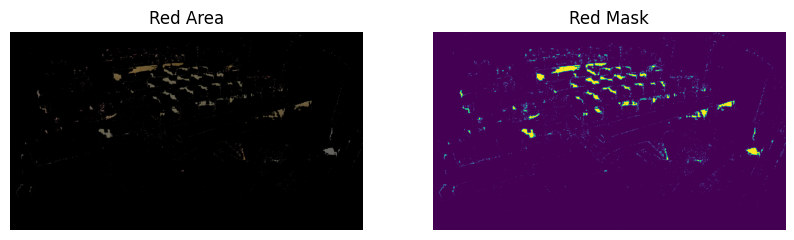

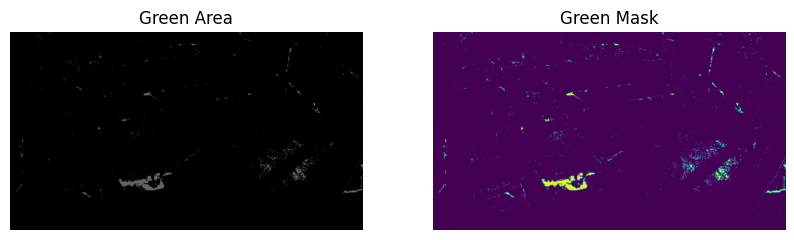

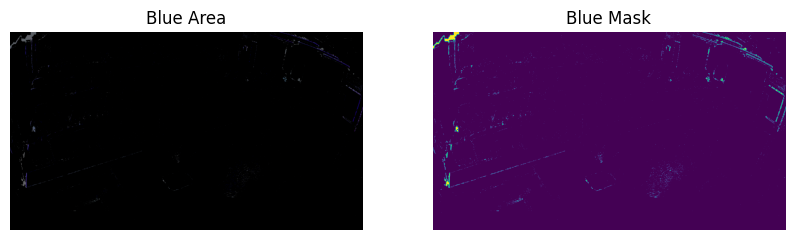

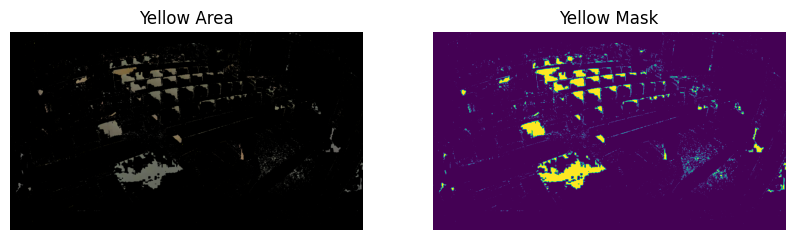

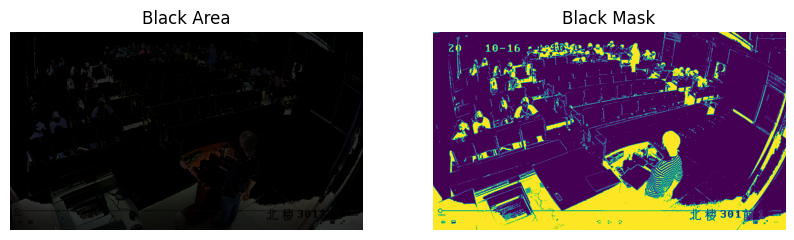

In [86]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 定义RGB色彩范围类
class ColorRange:
    def __init__(self, name, lower_rgb, upper_rgb):
        self.name = name
        self.lower = np.array(lower_rgb, dtype=np.uint8)
        self.upper = np.array(upper_rgb, dtype=np.uint8)

def segment_image_by_colors(image_path, color_ranges):
    # 读取图像
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    segmented_images = []

    # 对每个颜色类别进行分割
    for color_range in color_ranges:
        # 创建掩模
        mask = cv2.inRange(img_rgb, color_range.lower, color_range.upper)
        
        # 使用掩模提取相应区域
        result = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)
        
        segmented_images.append((color_range.name, result, mask))

    return segmented_images

def show_segmented_images(segmented_images):
    # 显示每个颜色类别的结果
    for color_name, segmented_img, mask in segmented_images:
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(segmented_img)
        plt.title(f"{color_name} Area")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(mask)
        plt.title(f"{color_name} Mask")
        plt.axis('off')

        plt.show()

# 输入图像路径
image_path = r'C:\Users\rainbow_yu\Desktop\test.png'

# 定义一些颜色类别的范围
color_ranges = [
    ColorRange("Red", [100, 0, 0], [255, 100, 100]),
    ColorRange("Green", [0, 100, 0], [100, 255, 100]),
    ColorRange("Blue", [0, 0, 100], [100, 100, 255]),
    ColorRange("Yellow", [100, 100, 0], [255, 255, 100]),
    ColorRange("Black",[0, 0, 0], [50, 50, 50])
]

# 分割图像
segmented_images = segment_image_by_colors(image_path, color_ranges)

# 显示结果
show_segmented_images(segmented_images)
